Some typical NumPy 'random' functions:

In [8]:
import numpy as np

# To generate a random float values between 0 and 1 (exclusive)
print(np.random.rand(3, 2)) # Creates a 3 x 2 matrix of random float values between 0 and 1 (exclusive)

# To generate random float values from standard normal distribution (mean = 0 and std = 1)
print(np.random.randn(5)) # Generates 5 random float values from standard normal distribution

# To generate random integer values within a range of values
print(np.random.randint(1, 100, 10)) # Generates 10 random integer values between 1 and 100 (exclusive)

# To randomly select an element from a given list of elements
print(np.random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9], size=3)) # Three random numbers from the given array will be chosen

# To generate a random sample of values from a normally distributed with a specified mean and standard deviation
print(np.random.normal(loc=0, scale=1, size=10)) # 10 random values will be generated from a normally distributed data where 0 (loc) is the mean and 1 (scale) is the standard deviation

# To set a seed for a random number generation to ensure you get the same results later as well
print(np.random.seed(42)) # This ensures that any random numbers generated in the program are same every time you run the program. The seed value '42' can be any other value

[[0.96535792 0.32011182]
 [0.82954231 0.21164725]
 [0.85321651 0.75441864]]
[ 0.10572088  1.83276105 -2.34857489 -0.14577867 -1.26010741]
[24 94 22  5 85 96 80 27 10 42]
[5 2 1]
[ 1.72841516  2.0726552   0.75345131  1.5414416   0.05046826  0.42560937
 -0.36289844 -0.63940829 -1.44428602 -0.32584067]
None


AIM #1: Generate a very large dataset
1. Generate a dataset of 1 million random data items between 1 and 100 items using only pandas
2. Generate a dataset of 1 million random data items between 1 and 100 using only NumPy
3. Calculate the time it takes for both the above operations. 
    3.1. Import the 'time' module, and use the time() function to calculate current time
    3.2. Which one is faster and why?

In [9]:
# Write your code for AIM #1 here
import pandas as pd
import numpy as np
import time

start_time = time.time()
df = pd.DataFrame({'data': np.random.randint(1, 101, size=1000000)})
pandas_time = time.time() - start_time

start_time = time.time()
np_array = np.random.randint(1, 101, size=1000000)
numpy_time = time.time() - start_time

print("Time taken by Pandas:", pandas_time)
print("Time taken by NumPy:", numpy_time)

if pandas_time < numpy_time:
    print("Pandas is faster.")
elif pandas_time > numpy_time:
    print("NumPy is faster.")
else:
    print("Both are equally fast.")

Time taken by Pandas: 0.019530534744262695
Time taken by NumPy: 0.016698837280273438
NumPy is faster.


AIM #2: Basic statistics
For the given dataset on sleep health and lifestyle, do the following
1. Using only pandas, load the dataset, calculate mean 'Sleep Duration', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Heart Rate' and 'Daily Steps'.
2. Do the same as in Step 1 using only NumPy
3. Using only pandas, first calculate correlation (across only the numerical variables), and then separate correlation between...
    Sleep duration and Age
    Sleep duration and Heart rate
    Sleep duration and Daily steps
4. Using only NumPy, do the same as Step 3
5. Using pandas only, calculate standard deviation for 'Sleep Duration'. 
6. Usiong NumPy only, calculate standard deviation for 'Sleep Duration'. 
7. Calculate the time difference between using pandas and NumPy, right from the step of loading the dataset to the final standard deviation step. 
    5.1. Which one is faster and why?

In [10]:
# Write your code for AIM #2 here
import pandas as pd
import numpy as np
import time

start_time = time.time()
df = pd.read_csv('sleep_health.csv')
mean_values = df[['Sleep Duration', 'Systolic blood pressure', 'Diastolic blood pressure', 'Heart Rate', 'Daily Steps']].mean()
print("Mean values using pandas:")
print(mean_values)
pandas_time = time.time() - start_time

start_time = time.time()
data = np.genfromtxt('sleep_health.csv', delimiter=',', skip_header=1)
mean_values_np = np.mean(data[:, [1, 2, 3, 4, 5]], axis=0)
print("Mean values using NumPy:")
print(mean_values_np)
numpy_time = time.time() - start_time

correlation = df[['Sleep Duration', 'Age', 'Heart Rate', 'Daily Steps']].corr()
print("Correlation matrix using pandas:")
print(correlation)

data_np = np.genfromtxt('sleep_health.csv', delimiter=',', skip_header=1)
correlation_np = np.corrcoef(data_np[:, [1, 5, 6, 7]], rowvar=False)
print("Correlation matrix using NumPy:")
print(correlation_np)

# Step 5: Using pandas only
std_dev = df['Sleep Duration'].std()
print("Standard deviation of Sleep Duration using pandas:")
print(std_dev)

# Step 6: Using NumPy only
std_dev_np = np.std(data[:, 1])
print("Standard deviation of Sleep Duration using NumPy:")
print(std_dev_np)

# Step 7: Time comparison
print("Time taken by pandas to load dataset and calculate mean, correlation, and standard deviation:", pandas_time)
print("Time taken by NumPy to load dataset and calculate mean, correlation, and standard deviation:", numpy_time)
if pandas_time < numpy_time:
    print("Pandas is faster.")
else:
    print("NumPy is faster.")

Mean values using pandas:
Sleep Duration                 7.132086
Systolic blood pressure      128.553476
Diastolic blood pressure      84.649733
Heart Rate                    70.165775
Daily Steps                 6816.844920
dtype: float64
Mean values using NumPy:
[        nan 42.18449198         nan  7.13208556  7.31283422]
Correlation matrix using pandas:
                Sleep Duration       Age  Heart Rate  Daily Steps
Sleep Duration        1.000000  0.344709   -0.516455    -0.039533
Age                   0.344709  1.000000   -0.225606     0.057973
Heart Rate           -0.516455 -0.225606    1.000000    -0.030309
Daily Steps          -0.039533  0.057973   -0.030309     1.000000
Correlation matrix using NumPy:
[[        nan         nan         nan         nan]
 [        nan  1.          0.19289645 -0.89875203]
 [        nan  0.19289645  1.         -0.03413446]
 [        nan -0.89875203 -0.03413446  1.        ]]
Standard deviation of Sleep Duration using pandas:
0.7956567308898189
St

AIM #3: Use suitable plots to visualize the data

1. Using only pandas (and matplotlib/seaborn if necessary) plot the distribution for
    1.1. Age
    1.2. Sleep Duration
    1.3. Quality of Sleep
    1.4. Physical Activity Level
    1.5. Stress Level
    1.6. Heart Rate
2. Using only NumPy, do the same as Step 1. You will need matplotlib for this
3. Using only pandas, use the appropriate plot to
    3.1. See the distribution of 'Sleep Duration' based on 'Quality of Sleep'
    3.2. See the distribution of 'Sleep Duration' based on 'Stress Level'
    3.3. See the distribution of 'Sleep Duration' based on 'Physical Activity Level'
    3.4. See the distribution of 'Sleep Duration' based on 'Occupation'
    3.5. See the distribution of 'Sleep Duration' based on 'BMI'
4. Using only NumPy, do the same as Step 3. You will need matplotlib for this
5. Using only pandas, use a suitable plot to see the relation between
    5.1. Age and Sleep Duration
    5.2. Sleep Duration and Heart Rate
    5.3. Heart Rate and Daily Steps
    5.4. Sleep Duration and Daily Steps
6. Using only NumPy, do the same as Step 5. You will need matplotlib for this 
7. Find the time difference between plotting using only pandas, and plotting using NumPy

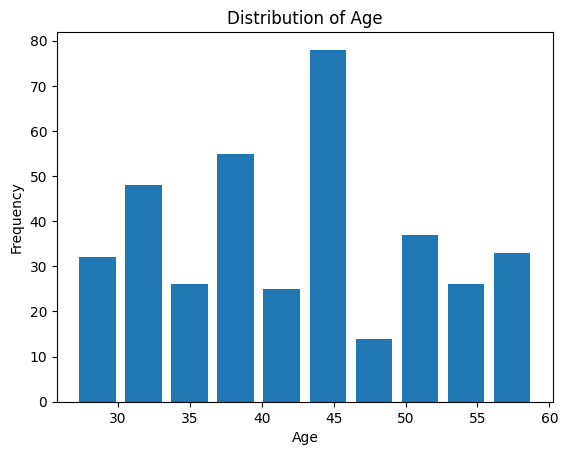

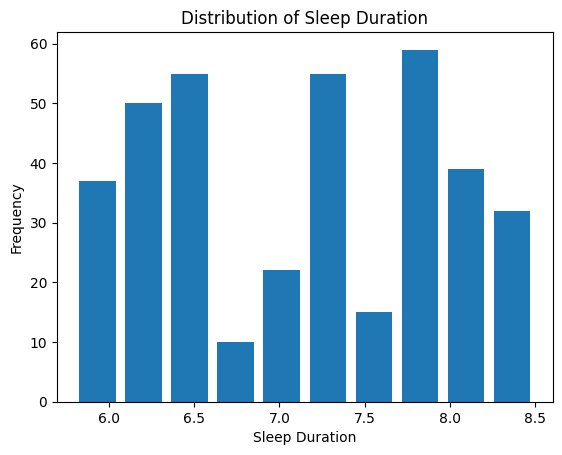

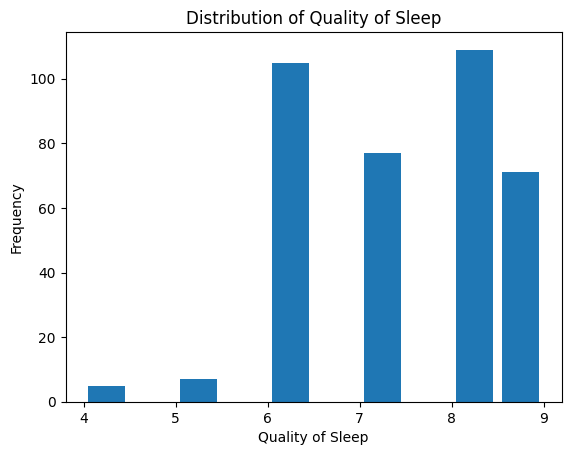

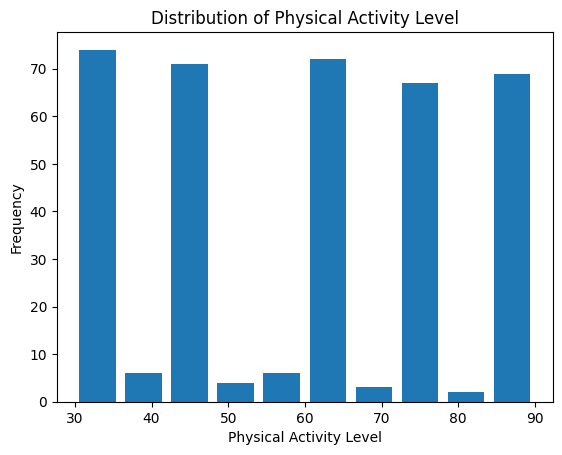

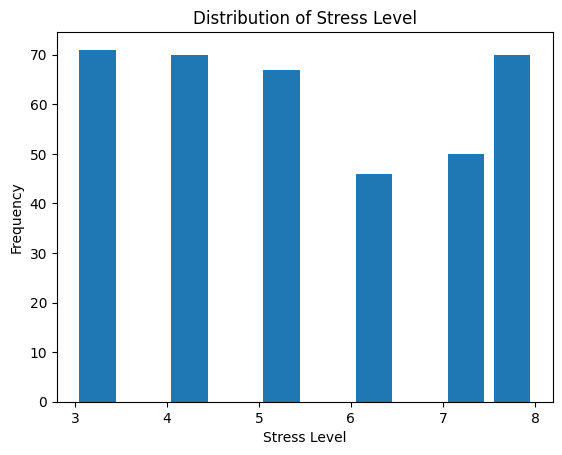

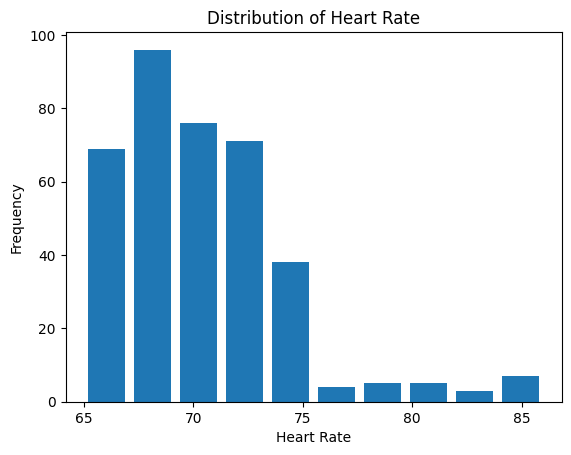

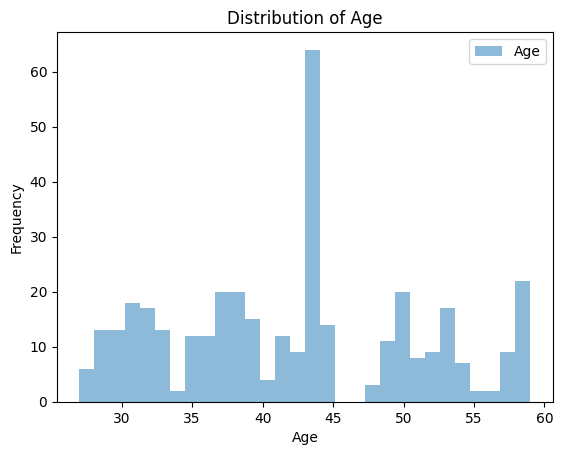

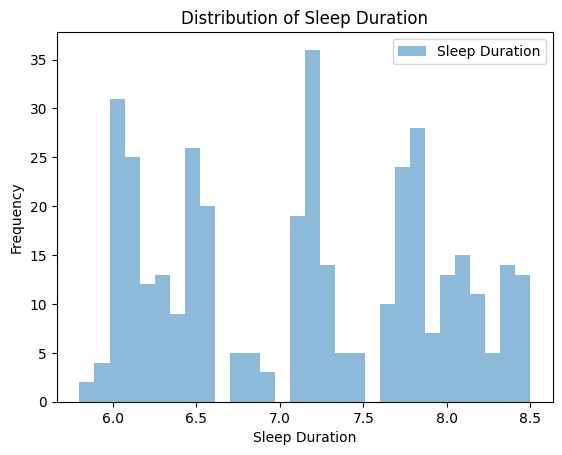

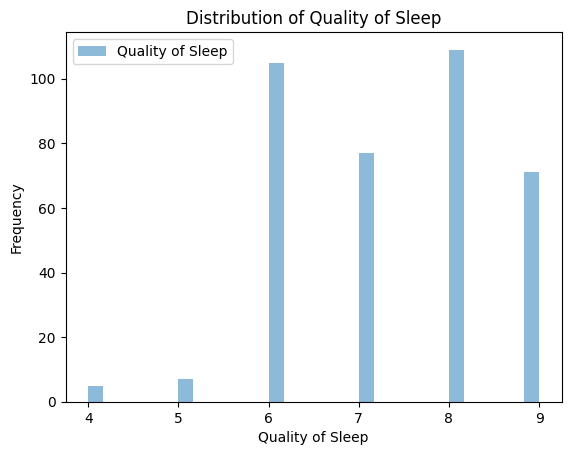

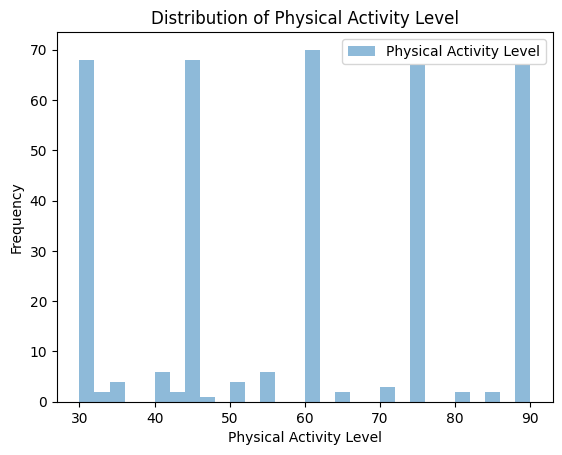

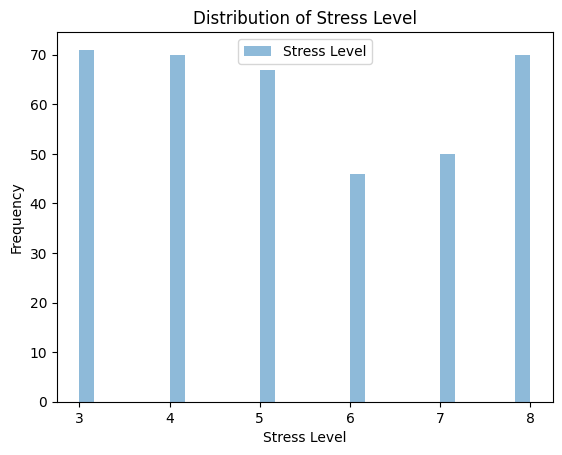

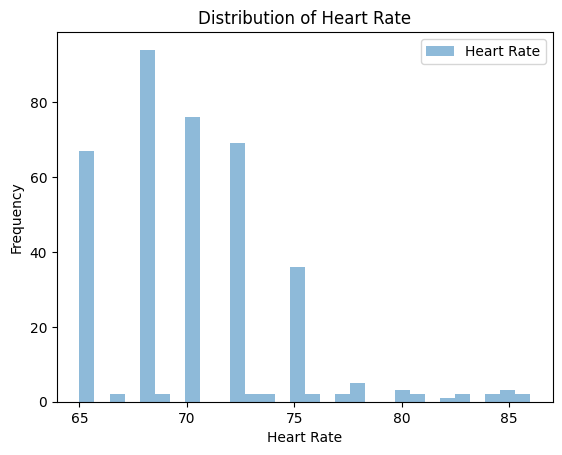

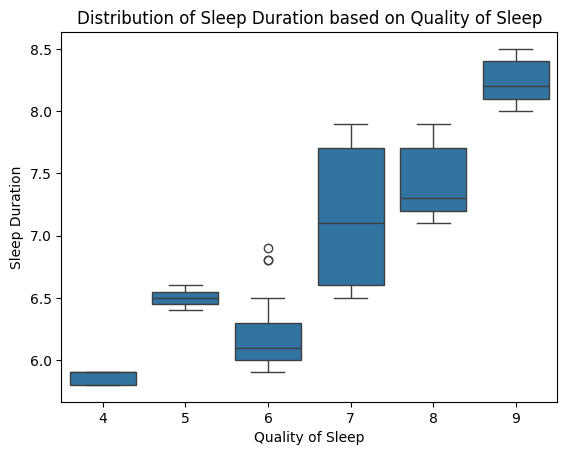

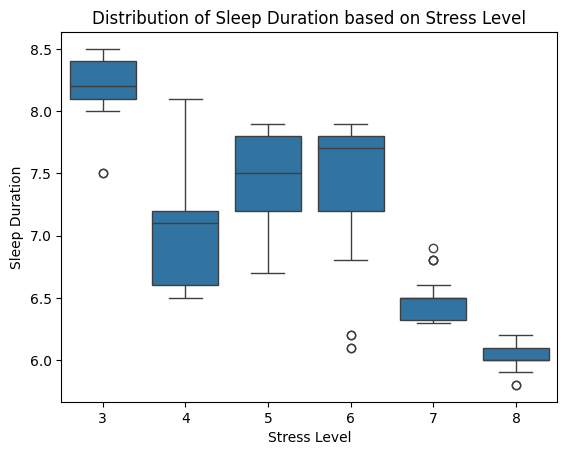

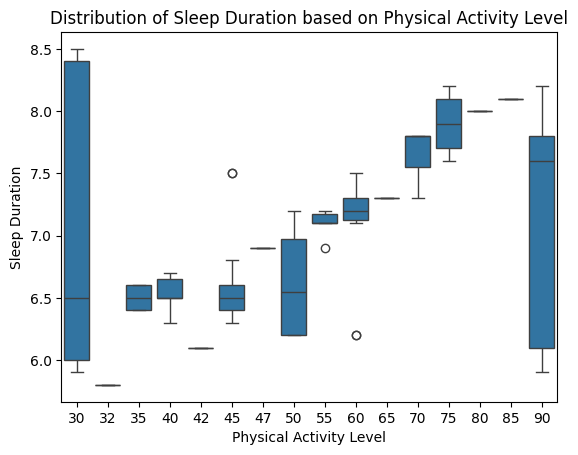

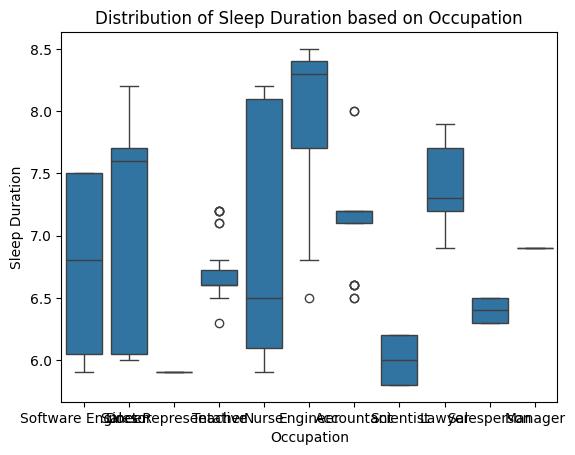

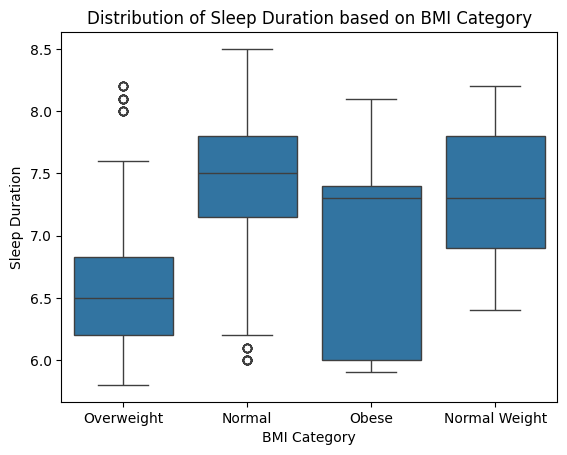

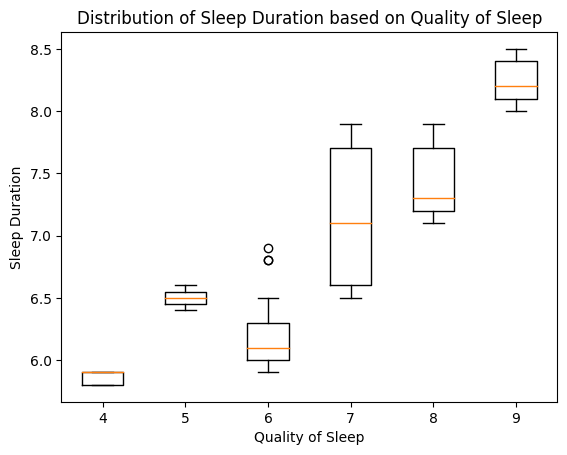

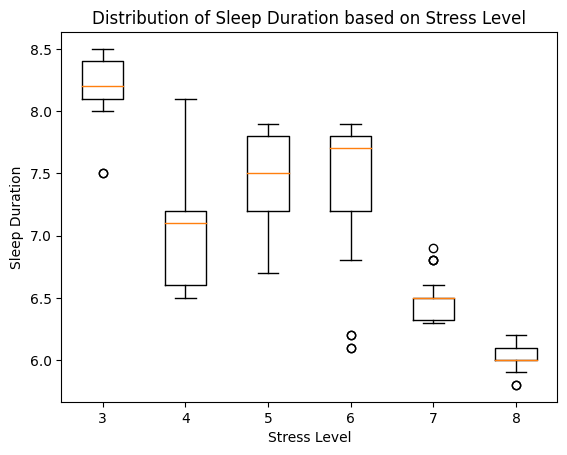

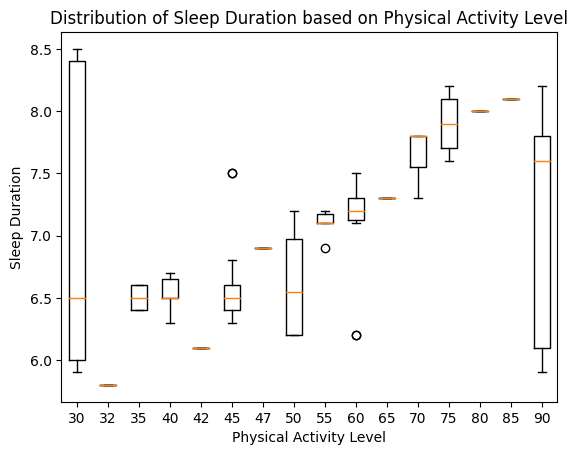

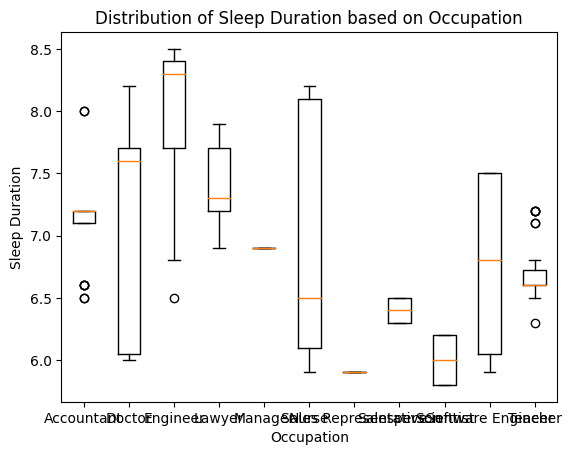

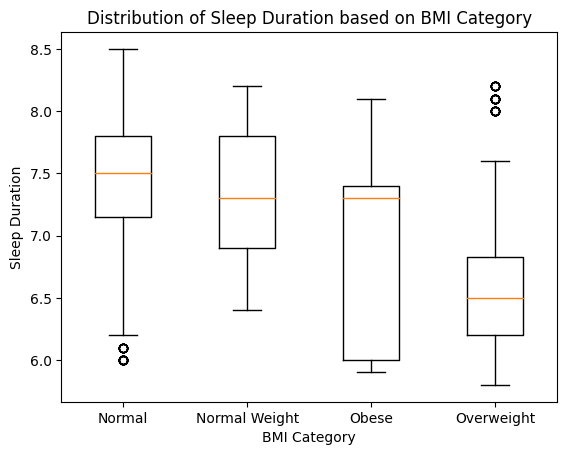

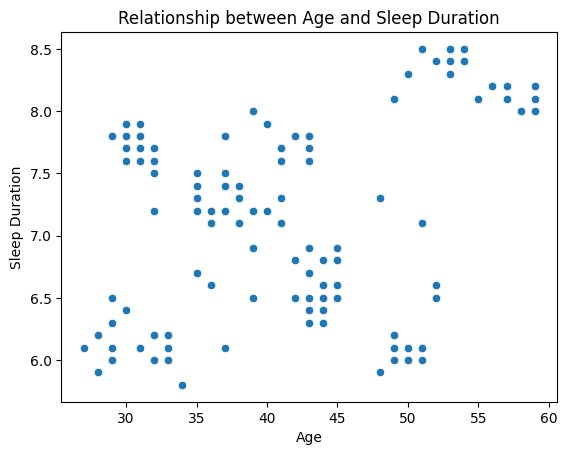

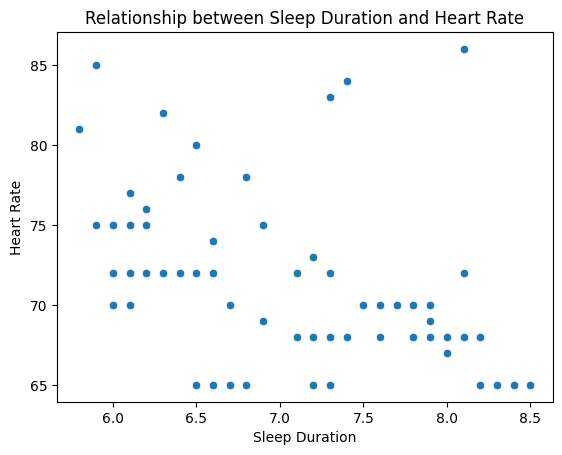

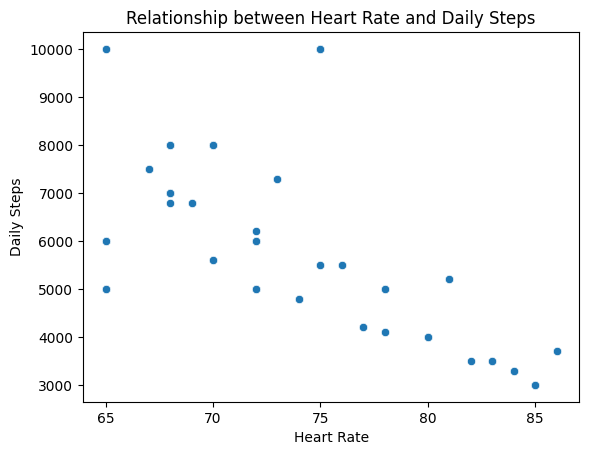

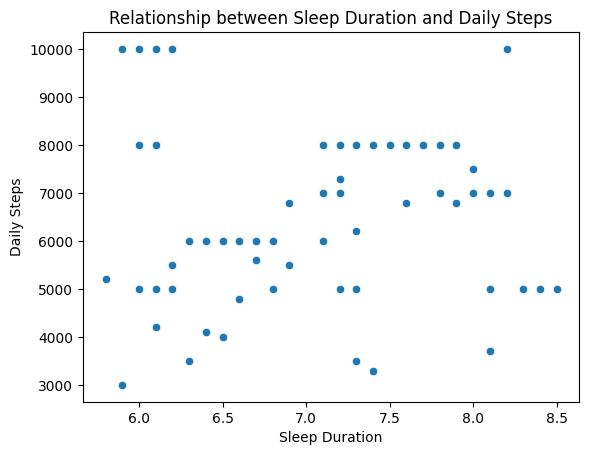

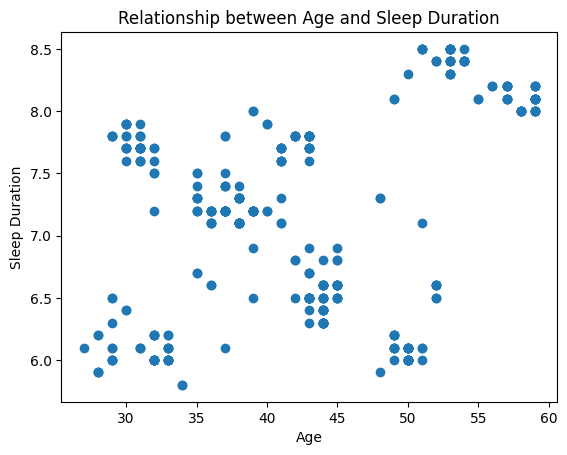

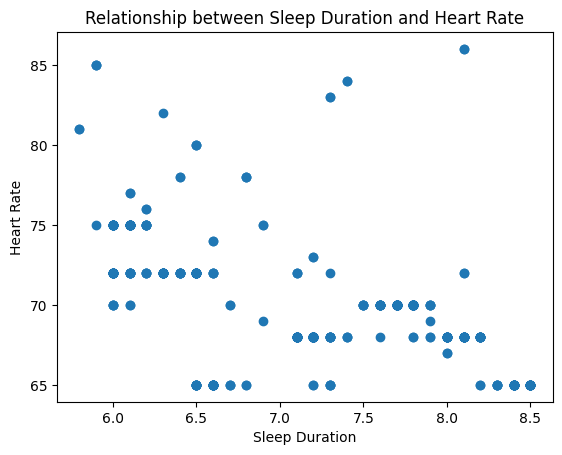

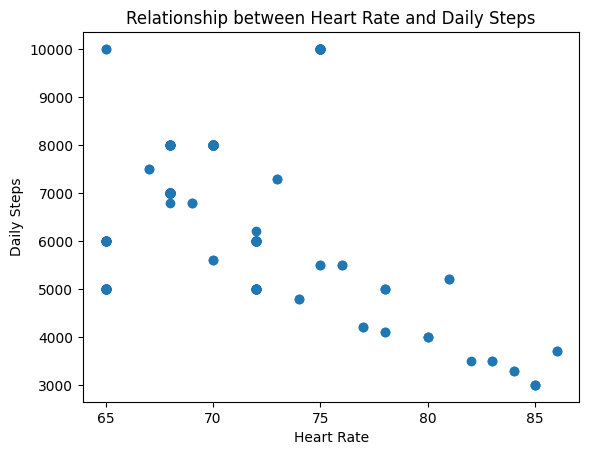

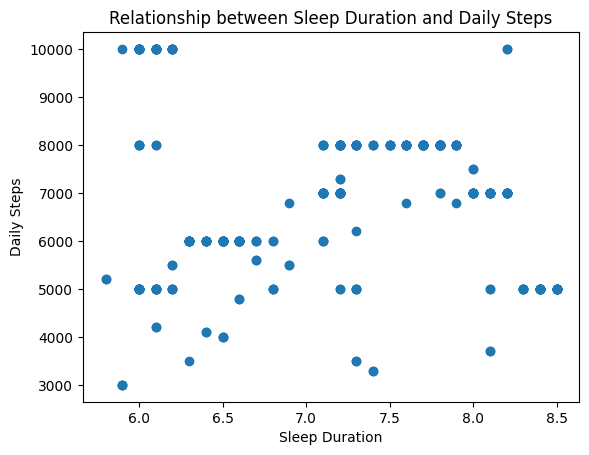

In [11]:
# Write your code for AIM #3 here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('sleep_health.csv')

# Step 1: Using only pandas to plot distributions
for column in ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate']:
    plt.figure()
    data[column].plot(kind='hist', rwidth=0.8)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Step 2: Using only NumPy to plot distributions (using matplotlib)
for column in ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate']:
    plt.figure()
    plt.hist(data[column], bins=30, alpha=0.5, label=column)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Step 3: Using only pandas to plot conditional distributions
for column in ['Quality of Sleep', 'Stress Level', 'Physical Activity Level', 'Occupation', 'BMI Category']:
    plt.figure()
    sns.boxplot(x=column, y='Sleep Duration', data=data)
    plt.title(f'Distribution of Sleep Duration based on {column}')
    plt.xlabel(column)
    plt.ylabel('Sleep Duration')
    plt.show()

# Step 4: Using only NumPy to plot conditional distributions (using matplotlib)
for column in ['Quality of Sleep', 'Stress Level', 'Physical Activity Level', 'Occupation', 'BMI Category']:
    plt.figure()
    unique_values = np.unique(data[column])
    sleep_duration_list = [data['Sleep Duration'][data[column] == i] for i in unique_values]
    plt.boxplot(sleep_duration_list, labels=unique_values)
    plt.title(f'Distribution of Sleep Duration based on {column}')
    plt.xlabel(column)
    plt.ylabel('Sleep Duration')
    plt.show()

# Step 5: Using only pandas to plot relationships between variables
for x, y in [('Age', 'Sleep Duration'), ('Sleep Duration', 'Heart Rate'), ('Heart Rate', 'Daily Steps'), ('Sleep Duration', 'Daily Steps')]:
    plt.figure()
    sns.scatterplot(x=x, y=y, data=data)
    plt.title(f'Relationship between {x} and {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

# Step 6: Using only NumPy to plot relationships between variables (using matplotlib)
for x, y in [('Age', 'Sleep Duration'), ('Sleep Duration', 'Heart Rate'), ('Heart Rate', 'Daily Steps'), ('Sleep Duration', 'Daily Steps')]:
    plt.figure()
    plt.scatter(data[x], data[y])
    plt.title(f'Relationship between {x} and {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

AIM #4: Other possible plotting

1. Think of other possible plots to show some interesting distribution and relations. Do this using both pandas and NumPy



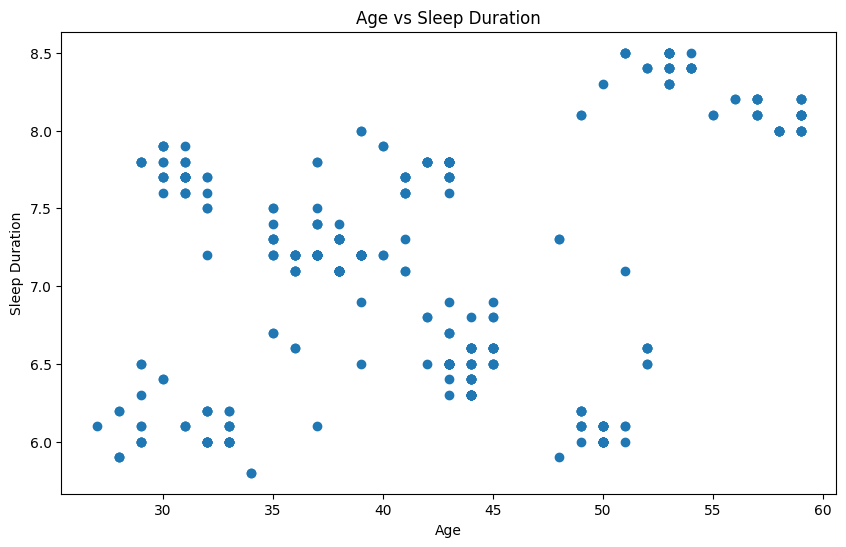

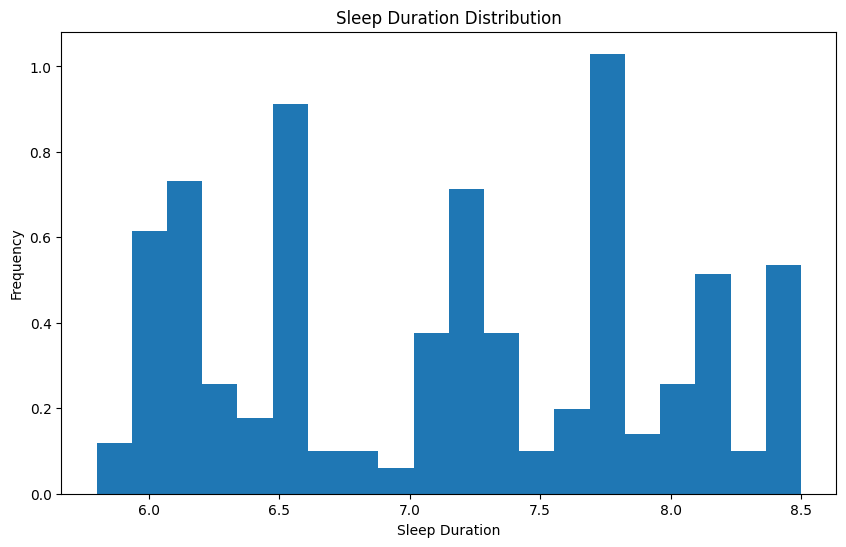

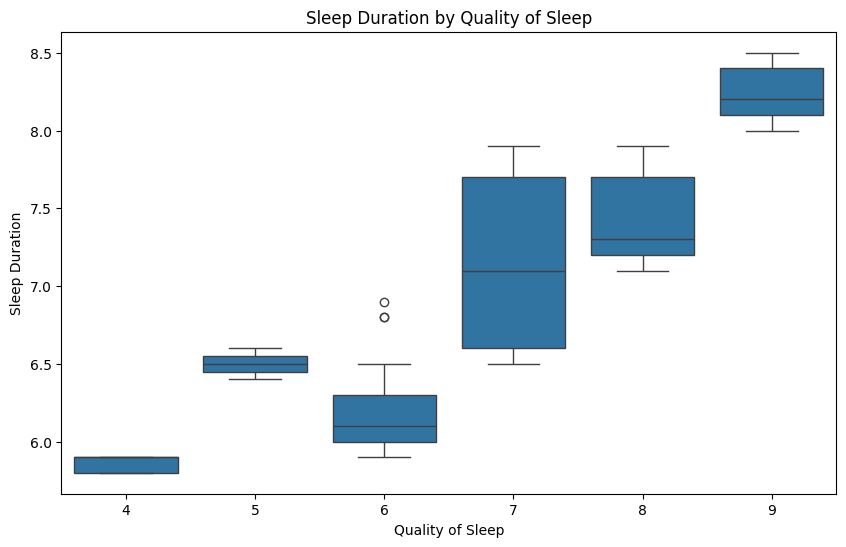

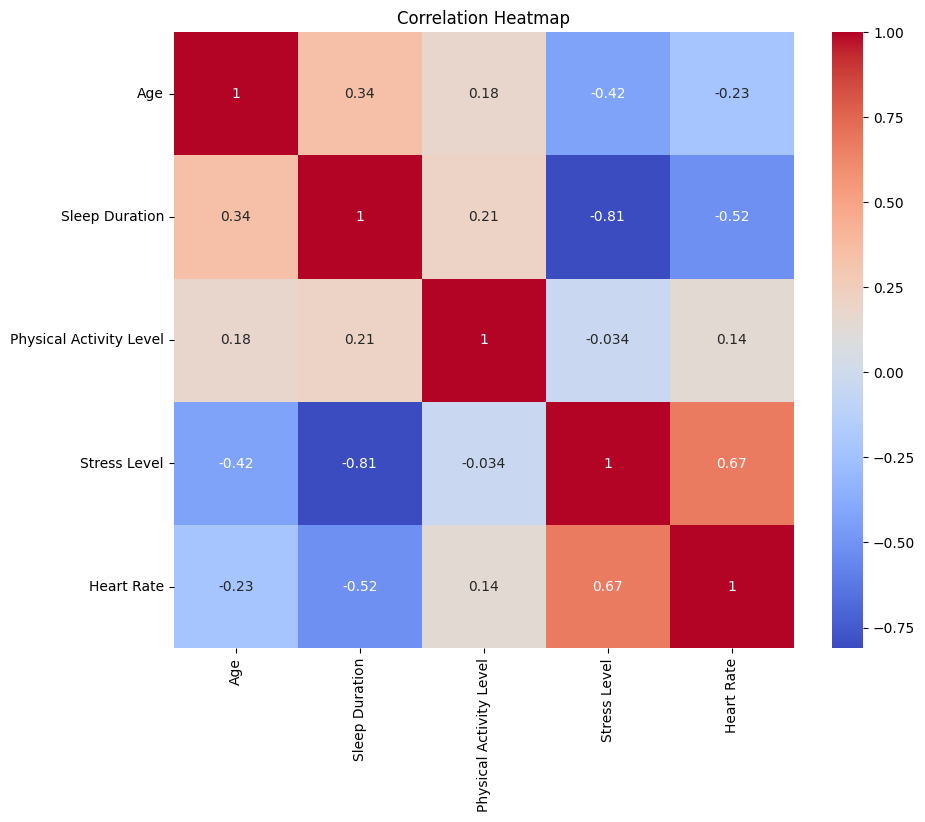

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('sleep_health.csv')

# Other possible plotting using pandas and NumPy

# Scatter plot with Age on x-axis and Sleep Duration on y-axis
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Sleep Duration'])
plt.title('Age vs Sleep Duration')
plt.xlabel('Age')
plt.ylabel('Sleep Duration')
plt.show()

# Histogram of Sleep Duration
plt.figure(figsize=(10, 6))
plt.hist(data['Sleep Duration'], bins=20, density=True)
plt.title('Sleep Duration Distribution')
plt.xlabel('Sleep Duration')
plt.ylabel('Frequency')
plt.show()

# Boxplot of Sleep Duration by Quality of Sleep
plt.figure(figsize=(10, 6))
sns.boxplot(x='Quality of Sleep', y='Sleep Duration', data=data)
plt.title('Sleep Duration by Quality of Sleep')
plt.xlabel('Quality of Sleep')
plt.ylabel('Sleep Duration')
plt.show()

# Heatmap of correlation between numerical variables
numerical_data = data[['Age', 'Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Heart Rate']]
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()